Data source: https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

## Part 1: Exploratory Data Analysis

### Load Data

In [2]:
import pandas as pd

df = pd.read_csv('bank_churn.csv')
df.head().append(df.tail())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand Raw Data

In [3]:
df.info()

# 10000 rows, 14 columns, no missing data (all 10000 non-null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Define the dependent variable

In [4]:
y = df['Exited']

#### Check % of "Exited"

In [5]:
print(sum(y) / len(y))

# 2037 "Exited" rows

0.2037


### Understand the numerical variables

In [6]:
df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


### Visualize these numerical variables
- Use Boxplot

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#### make boxplots for the above 6 features

Expect: One plot contains the boxplot of the Exited & non-Exited group side by side

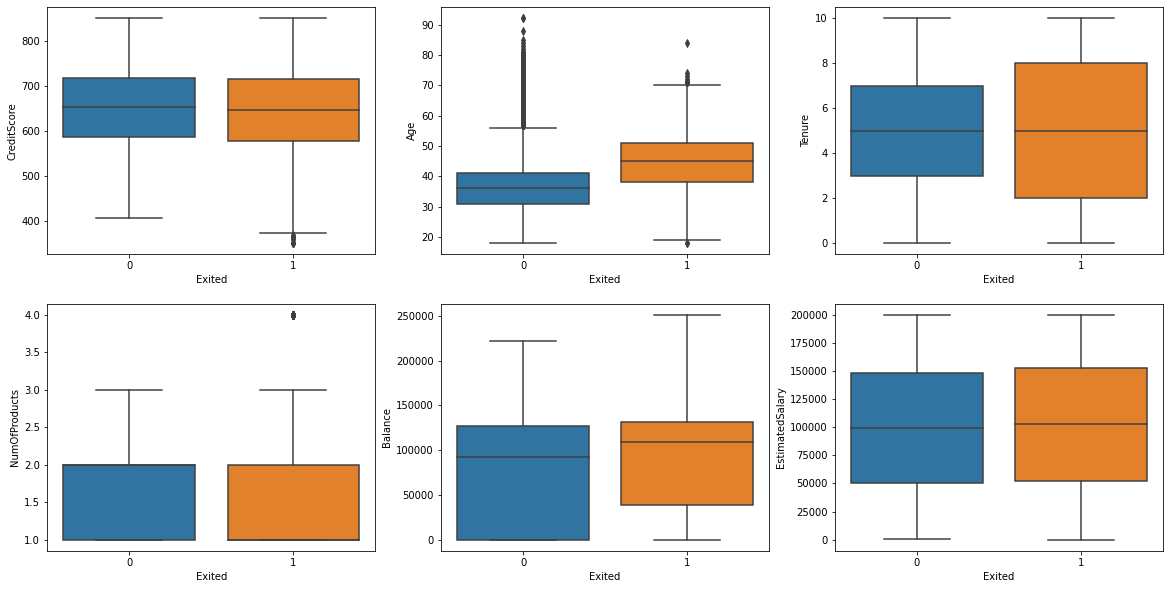

In [8]:
# Define a 2 x 3 sub-plot setup
_, axss = plt.subplots(2,3, figsize=[20, 10])

sns.boxplot(x='Exited', y ='CreditScore', data=df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=df, ax=axss[1][2])

### Visualize the categorical features

- Geography, Gender, HasCrCard, IsActiveMember
- Use **Countplot** rather than boxplot

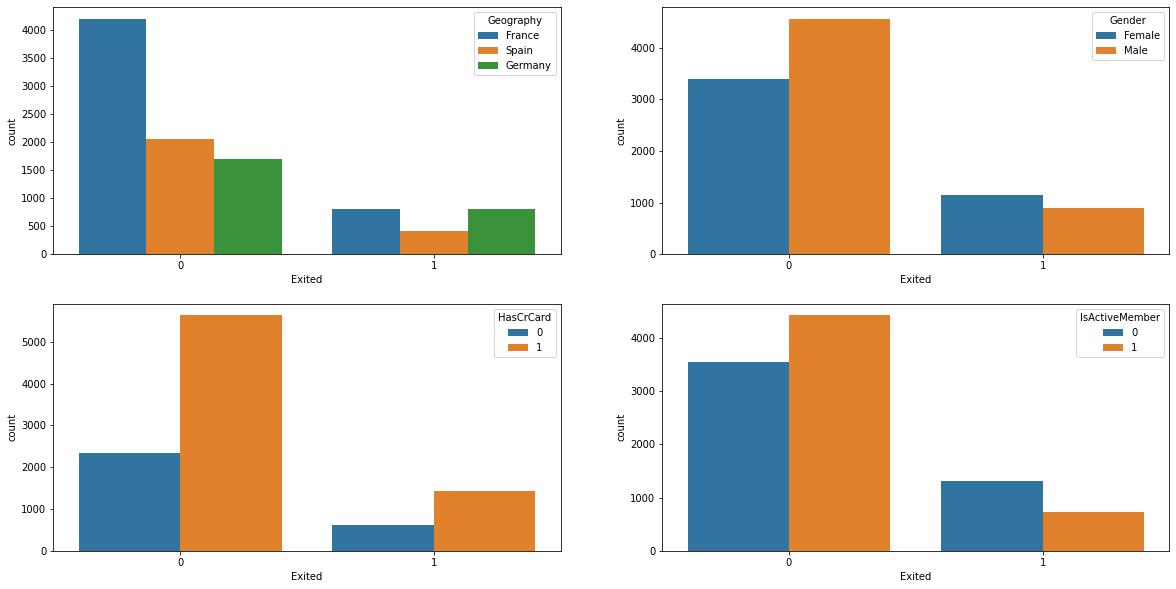

In [9]:
_, axss = plt.subplots(2, 2, figsize=[20, 10])

sns.countplot(x='Exited', hue='Geography', data=df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=df, ax=axss[1][1])

### Visualize correlation
- Heatmap

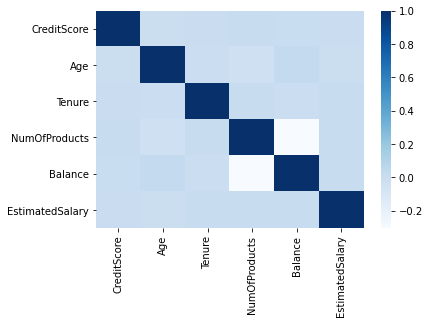

In [10]:
# correlations between features
corr_score = df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()

# show heapmap of correlations
sns.heatmap(corr_score, cmap="Blues")

In [11]:
corr_score

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.012238,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,-0.030680,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,0.013444,-0.012254,0.007784
NumOfProducts,0.012238,-0.030680,0.013444,1.000000,-0.304180,0.014204
Balance,0.006268,0.028308,-0.012254,-0.304180,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.014204,0.012797,1.000000


### Dropping useless columns and the y-variable

In [12]:
drop_cols = ['RowNumber', 'CustomerId', 'Surname', 'Exited']
X = df.drop(drop_cols, axis=1)

### Do some encodings for categorical variables

In [13]:
# ordinal encoding for gender (Male or Female)
# Suppose 'Female' = True and 'Male' = False

X['Gender'] = X['Gender'] == 'Female'

In [14]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,True,42,2,0.00,1,1,1,101348.88
1,608,Spain,True,41,1,83807.86,1,0,1,112542.58
2,502,France,True,42,8,159660.80,3,1,0,113931.57
3,699,France,True,39,1,0.00,2,0,0,93826.63
4,850,Spain,True,43,2,125510.82,1,1,1,79084.10


In [15]:
# one hot encoding for Geography
# In this dataset, there are only 3 countries (if more countries, then more columns)

X = pd.get_dummies(X, columns=['Geography'], drop_first=False)
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,True,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,True,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,True,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,True,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,True,43,2,125510.82,1,1,1,79084.10,0,0,1


## Part 2: Model Training

### Split training and test data (suppose 80/20)

In [16]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

# stratify: default None, if not, data is split in a stratified fashion.

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 8000 observation with 12 features
test data has 2000 observation with 12 features


In [17]:
print(y_train.sum())
print(y_test.sum())

1630
407


### Standardization for training and test data

#### Why scaling the data (by standardization)?

1. speed up gradient descent
2. same scale
3. algorithm requirments

#### How to do standardization? (For example)

Step 1: use training data to **train** the standardscaler to get mean and std

Step 2: apply the mean and std to both training and test data

.fit() does the training, .transform() does the applying.

Reference: <br>
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py <br>
https://scikit-learn.org/stable/modules/preprocessing.html

In [18]:
from sklearn.preprocessing import StandardScaler

# fit
scaler = StandardScaler()
scaler.fit(X_train)

# transform
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Invoke the Algorithms

In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier()

### Logistic Regression

Docs: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### Fit training data

In [20]:
classifier_logistic.fit(X_train, y_train)

# Read the output for default setting of hyper-parameters

# L1_ratio is None. --> 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'

# Penalty is L2. Could be "l1, l2, elasticnet, none". (None means no regularization.)
# (elastic net is L1 + L2)

# C = 1.0 --> 1/lambda (inverse of reg-strength) (smaller values --> stronger regularization)

# max_iter = 100

# tolerance = 0.0001 to define convergence

# solver = 'lbfgs'  --> iterative method for solving unconstrained nonlinear optimization (support l2 only)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Use this model on X_test to make predictions

We will use cross validation and grid search to tune the model later.

Note that the test data can only be used once. We can't use the result on test data and then tune the model again.

In [21]:
# predict on test data
pred_by_logistic = classifier_logistic.predict(X_test)
pred_by_logistic

array([0, 0, 0, ..., 0, 0, 0])

Or just print accuracy score.

We will mention more evaluation metrics later.

In [22]:
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.8125

#### Use 5-fold cross validation to get the accuracy score

In [23]:
model_names = ['Logistic Regression', 'KNN', 'Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is 0.8098749999999999
Model accuracy of KNN is 0.8241250000000001
Model accuracy of Random Forest is 0.8615


At the first glance, Random Forest is the best methodology, but we have not tuned the data.

But in reality, it's a simple and good practice to just train a Random Forest model at the beginning.

### Try on SVM?

In [24]:
from sklearn.svm import SVC

In [25]:
classifier_SVC = SVC(probability=True)

cv_score = model_selection.cross_val_score(classifier_SVC, X_train, y_train, cv=5)
print('Model accuracy of SVM is: ' + str(cv_score.mean()))

Model accuracy of SVM is: 0.8571249999999999


## Part 3: Model Tuning

- Grid Search to find optimal hyper-parameters.

In [26]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    """
    gs is a grid-search object.
    """
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

#### For Logistic Regression

In [27]:
params = {'penalty':('l1', 'l2'), 
          'C':(0.01, 1, 5, 10)}    # Default max_iter = 100

# Since we want to try L1 reg, we can't use 'lbfgs' solver which only supports L2 reg.

gs_LR = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid=params, cv=5)

# This is a lazy algorithm. Nothing is run until we use actual data to fit.

In [28]:
# This will take a few seconds.

gs_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 1, 5, 10), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
# Extract hyper-parameters of the best LR model
print_grid_search_metrics(gs_LR)

Best score: 0.8100000000000002
Best parameters set:
C:1
penalty:l1


In [30]:
# Extract best model
best_LR_model = gs_LR.best_estimator_
best_LR_model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### For KNN

In [31]:
# there's only one hyper-parameter in KNN, which is the number of cluster desired.
params_KNN = {'n_neighbors':(1,3,5,7,9)}

gs_KNN = GridSearchCV(KNeighborsClassifier(), param_grid=params_KNN, cv=5)

gs_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (1, 3, 5, 7, 9)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
# Extract hyper-parameters of the best KNN model
print_grid_search_metrics(gs_KNN)

Best score: 0.832625
Best parameters set:
n_neighbors:9


In [33]:
# Extract the best KNN model
best_KNN_model = gs_KNN.best_estimator_
best_KNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

#### For Random Forest

In [34]:
# The hyper-parameters is the number of trees
params_RF = {'n_estimators': [40,60,80]}

gs_RF = GridSearchCV(RandomForestClassifier(), param_grid=params_RF, cv=5)

gs_RF.fit(X_train, y_train)

# Look at other hyper-parameters:

# criterion = 'gini'

# max_depth = None, max_leaf_nodes = None, so there's no pruning

# For other hyper-parameters，min_sample_leaf = 1, min_sample_split = 2

# Default n_estimators = 100

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [35]:
# Extract hyper-parameters of the best RF model
print_grid_search_metrics(gs_RF)

Best score: 0.8623749999999999
Best parameters set:
n_estimators:40


In [36]:
# Extract the best random forest model
best_RF_model = gs_RF.best_estimator_
best_RF_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Part 4: Model Evaluation 
- Confusion Matrix
- ROC

Review:

Precision = tp / (tp + fp). A high precision model means low fp, meaning that out of all +ve cases predicted, very few  are wrong. (i.e. many positive cases claimed are truly positive). (many customers who are predicted to churn truly exited.)

Recall = tp / (tp + fn). A high recall model means low fn, meaning that out of all -ve cases predicted, very few are wrong (i.e. most negative cases claimed are truly negative). (many customers who are predicted to stay truly stayed.)

### Confusion Matrix

In [37]:
# Import packages

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [38]:
# Calculate the entries of confusion matrix, and print them out

def cal_evaluation(classifier, cm):
    """
    classifier: name of the classifier, a str
    cm: confusion_matrix, an array
    """
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier, "\n ========================")
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

In [39]:
# print out confusion matrices

def draw_confusion_matrices(confusion_matricies):
    """
    Take the confusion matrix of each model (input arranged in some format)
    """
    class_names = ['Stay', 'Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        
        cal_evaluation(classifier, cm)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for ' + classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

Random Forest 
Accuracy is: 0.8625
precision is: 0.7578125
recall is: 0.47665847665847666


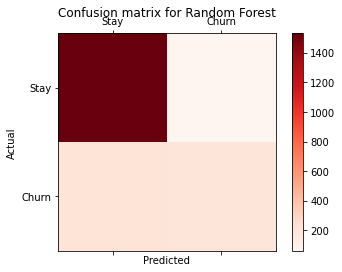

Logistic Regression 
Accuracy is: 0.8125
precision is: 0.5987654320987654
recall is: 0.23832923832923833


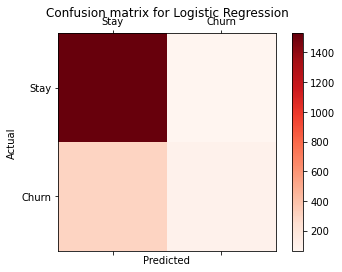

K nearest neighbor 
Accuracy is: 0.834
precision is: 0.6728110599078341
recall is: 0.35872235872235875


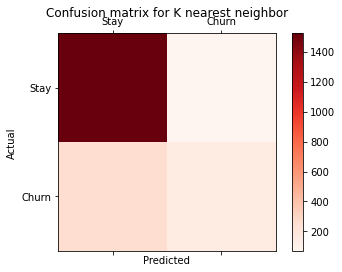

In [40]:
# The confusion matrix will take y_test (the actual) and the y_pred (the predicted value by the best model).
# And then display the confusion matrix

confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test, best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test, best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))]

draw_confusion_matrices(confusion_matrices)

### ROC Curve (by calculating TPR and FPR) and the AUC

In [41]:
# Import packages
from sklearn.metrics import roc_curve
from sklearn import metrics    # for AUC

### Take the example of Random Forest
#### Step 1: Use predict_proba to get the probability results of Random Forest

In [42]:
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
y_pred_rf

# [:, 1] because the return of predict_proba(.) is 1-p and p.

array([0.075, 0.1  , 0.   , ..., 0.05 , 0.125, 0.3  ])

#### Step 2: Calculate TPR and FPR for ROC curve (under different thresholds)

In [43]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

# _ is actually the threshold, but it's not used here.

#### Step 3: Plot ROC Curve

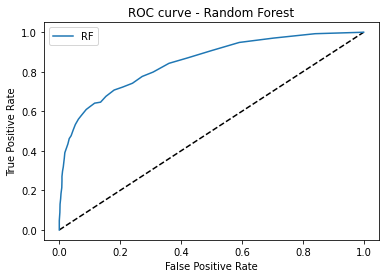

In [44]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Random Forest')
plt.legend(loc='best')
plt.show()

#### Step 4: Calculate Area Under Curve (AUC)

In [45]:
metrics.auc(fpr_rf, tpr_rf)

# Note the order of arguments.

0.847852474971119

### Similarly, for Logistic Regression

In [46]:
# Step 1
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]

# Step 2
fpr_lr, tpr_lr, thres = roc_curve(y_test, y_pred_lr)

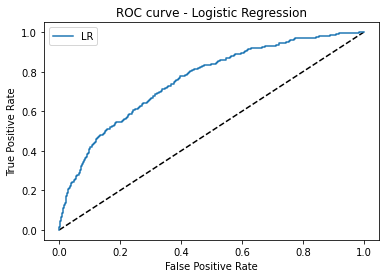

In [47]:
# Step 3
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Logistic Regression')
plt.legend(loc='best')
plt.show()

In [48]:
# Step 4
metrics.auc(fpr_lr, tpr_lr)

0.7580029952911309

### Similarly, for KNN

In [49]:
# Step 1
y_pred_knn = best_KNN_model.predict_proba(X_test)[:, 1]

# Step 2
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)

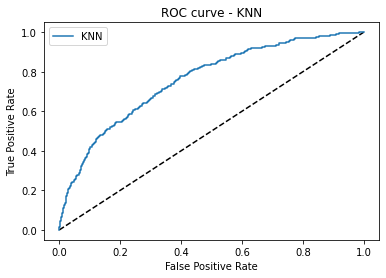

In [50]:
# Step 3
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - KNN')
plt.legend(loc='best')
plt.show()

In [51]:
# Step 4
metrics.auc(fpr_knn, tpr_knn)

0.7831537238316899

## Part 5: Some Discussions on Feature Importance

**Why Feature Importance?**

Training a model that accurately predicts outcomes is great, but most of the time you don't just need predictions, you want to be able to interpret your model.

For example, if you build a model of house prices, knowing which features are most predictive of price tells us which features people are willing to pay for. 

Feature importance is the most useful interpretation tool, and data scientists regularly examine model parameters (such as the coefficients of linear models), to identify important features.

**Implementation**

sklearn has two commands: feature_importance and permutation_importance

Here, feature_importance is used.

Pros:
- fast calculation
- easy to retrieve — one command

Cons:
- biased approach, as it has a tendency to inflate the importance of continuous features or high-cardinality categorical variables

**permutation_importance**: defined to be the difference between the *baseline metric* and metric from permutating the feature column. Check docs for what is "scoring".

https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance


**In the case of Random Forest**, **permutation importance** is a common, reasonably efficient, and very reliable technique. It directly measures variable importance **by observing the effect** on model accuracy **of randomly shuffling each predictor variable**.

This technique is broadly-applicable because it doesn't rely on internal model parameters, such as linear regression coefficients (which are really just poor proxies for feature importance).


**Introduction** <br>
https://machinelearningmastery.com/calculate-feature-importance-with-python/

**More on feature_importance vs. permutation_importance** <br>
https://explained.ai/rf-importance/

In [52]:
X.head()

# All features (12 columns)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,True,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,True,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,True,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,True,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,True,43,2,125510.82,1,1,1,79084.10,0,0,1


In [53]:
feature_importance_RF = best_RF_model.feature_importances_

print(feature_importance_RF)
print(sum(feature_importance_RF))

[0.14501687 0.01835791 0.24025781 0.08417821 0.14563028 0.1245558
 0.018588   0.0376617  0.14276871 0.01048641 0.02279011 0.00970819]
1.0


In [54]:
import numpy as np

# Sort input_array, and return the indices with the largest --> 2nd largest --> ... --> smallest number

indices = np.argsort(feature_importance_RF)[::-1]
indices

array([ 2,  4,  0,  8,  5,  3,  7, 10,  6,  1,  9, 11])

In [55]:
# Print the features ranking
print("Feature importance ranking in the Random Forest Model: \n")
for i in range(len(indices)):
    print("{0}: {1}".format(X.columns[indices[i]], round(feature_importance_RF[indices[i]], 4)))

Feature importance ranking in the Random Forest Model: 

Age: 0.2403
Balance: 0.1456
CreditScore: 0.145
EstimatedSalary: 0.1428
NumOfProducts: 0.1246
Tenure: 0.0842
IsActiveMember: 0.0377
Geography_Germany: 0.0228
HasCrCard: 0.0186
Gender: 0.0184
Geography_France: 0.0105
Geography_Spain: 0.0097


classification problem: impurity-based <br>
regression problem: variance。

In the impurity-based context, it means that if randomly shuffling every single feature, how much each feature contributes to decreasing the weighted impurity. So sum = 1.

If this is a regression problem，it means how much each feature can explain the total variance。So sum is 1.

Based on the plot below, I would say 5 features may be important ones.

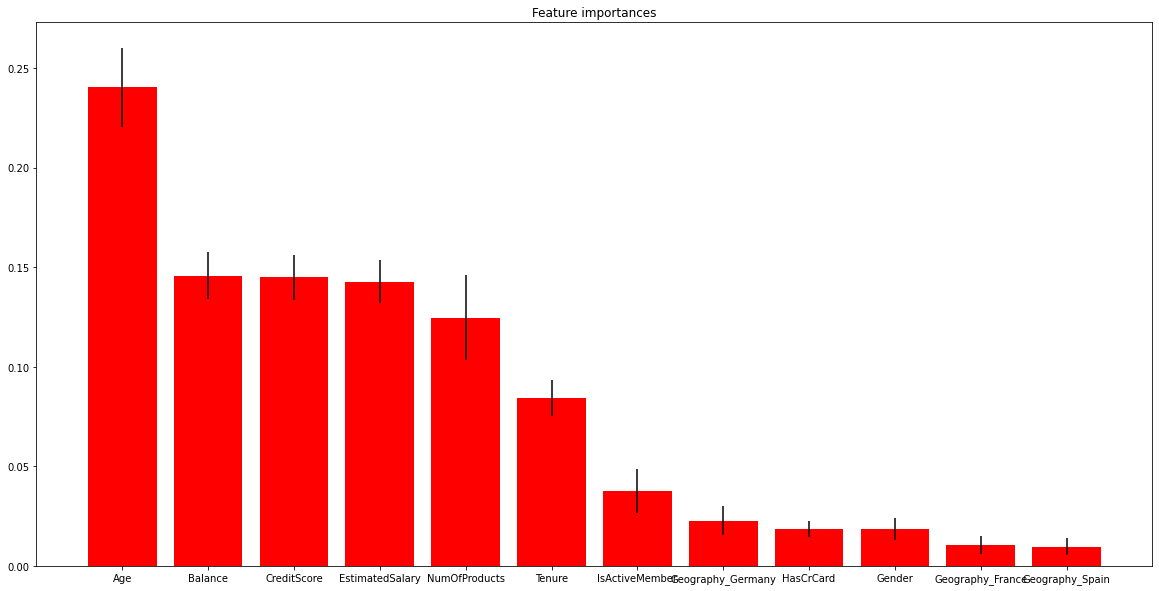

In [56]:
std = np.std([tree.feature_importances_ for tree in best_RF_model.estimators_], axis=0)

plt.figure(figsize=[20, 10])
plt.title("Feature importances")
plt.bar(range(X.shape[1]), 
        feature_importance_RF[indices],
        color="r", 
        yerr=std[indices], 
        align="center")

plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlim([-1, X.shape[1]])
plt.show()

#### For Logistic Regression


In [57]:
X_with_corr = X.copy()
X_with_corr['SalaryInRMB'] = X['EstimatedSalary'] * 6.91
X_with_corr.head()

# add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
    print("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))
  

Logistic Regression (L2) Coefficients
Age : 0.751
IsActiveMember : -0.5272
Gender : 0.2591
Geography_Germany : 0.2279
Balance : 0.162
Geography_France : -0.1207
Geography_Spain : -0.089
CreditScore : -0.0637
NumOfProducts : -0.0586
Tenure : -0.0452
HasCrCard : -0.0199
EstimatedSalary : 0.0137
SalaryInRMB : 0.0137
